In [1]:
quiet_library <- function(...) {
    suppressPackageStartupMessages(library(...))
}
quiet_library(Seurat)
quiet_library(ggplot2)
quiet_library(Matrix)
quiet_library(H5weaver)
quiet_library(dplyr)
quiet_library(viridis)
quiet_library(harmony)
quiet_library(Nebulosa)

# Fig 1b

## scRNA

In [42]:
scrna_samples <- read.csv('scRNAseq_cohort_TEAseq_followup_edit.csv')

In [43]:
scrna_samples$filler <- '1'
head(scrna_samples)

,Cohort,Subject.ID,Sex,Age,CMV.status,filler
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,BR1,BR1002,Male,29,Neg,1
2,BR1,BR1003,Female,31,Neg,1
3,BR1,BR1004,Male,31,Neg,1
4,BR1,BR1005,Female,28,Neg,1
5,BR1,BR1006,Male,32,Neg,1
6,BR1,BR1009,Female,27,Neg,1


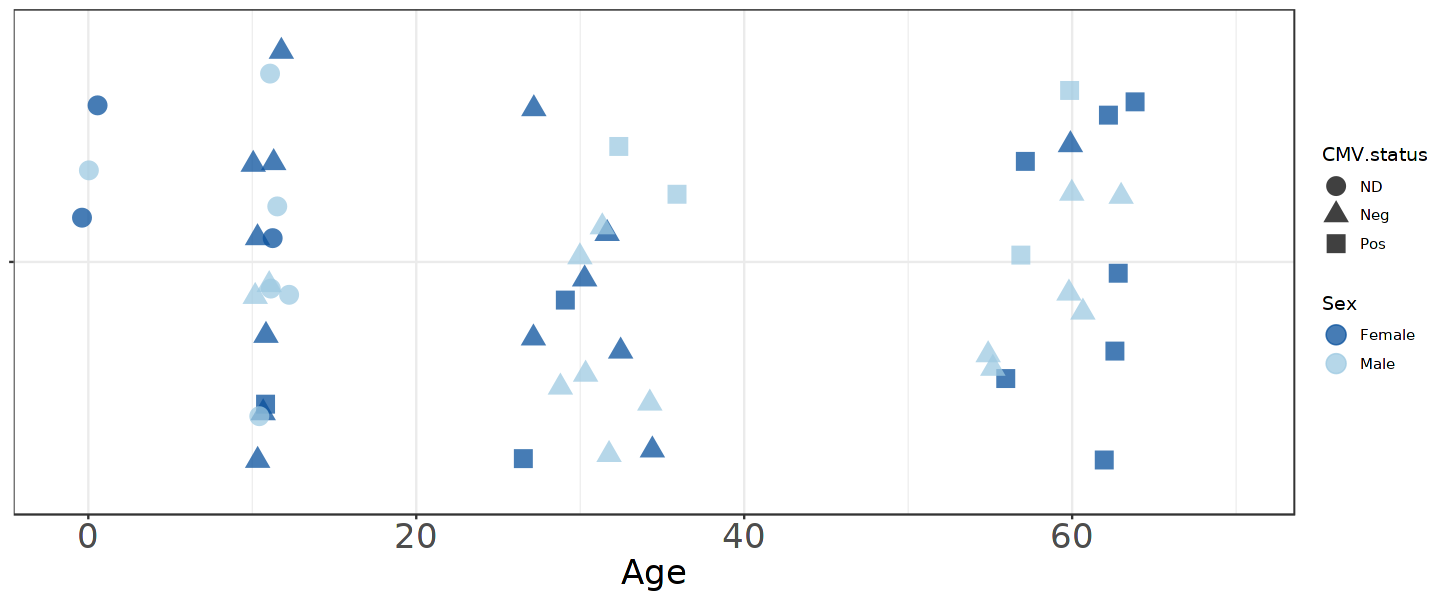

In [90]:
options(repr.plot.width = 12, repr.plot.height = 5)
p1 <- ggplot(scrna_samples, aes(x=Age, y=filler)) + geom_jitter(aes(color=Sex,shape=`CMV.status`), size=5, width=1, height=0.5, alpha=0.75) +
    scale_color_manual(values=c('#08519c','#9ecae1')) + xlim(-1,70) +
    theme_bw() + 
    theme(axis.text.x = element_text(size=20),
          axis.text.y = element_blank(),
          axis.title.y = element_blank(),
          axis.title.x = element_text(size=20),
          legend.position = 'right')
p1

In [92]:
# Open a pdf file
pdf("plots/scRNA_samples_plot.pdf", width = 12, height = 5) 
# 2. Create a plot
p1
# Close the pdf file
dev.off() 

png 
  2

## Flow/TEA

In [36]:
tea_samples <- read.csv('tea_flow_samples.csv')

In [37]:
tea_samples$filler <- '1'
head(tea_samples)

,Cohort,SubjectID,Sex,Age,CMV,filler
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,UP1,PB00124,Female,11,Pos,1
2,UP1,PB00127,Female,11,Neg,1
3,UP1,PB00172,Female,11,Pos,1
4,UP1,PB00173,Female,11,Pos,1
5,UP1,PB00182,Female,11,Neg,1
6,UP1,PB00192,Female,11,Neg,1


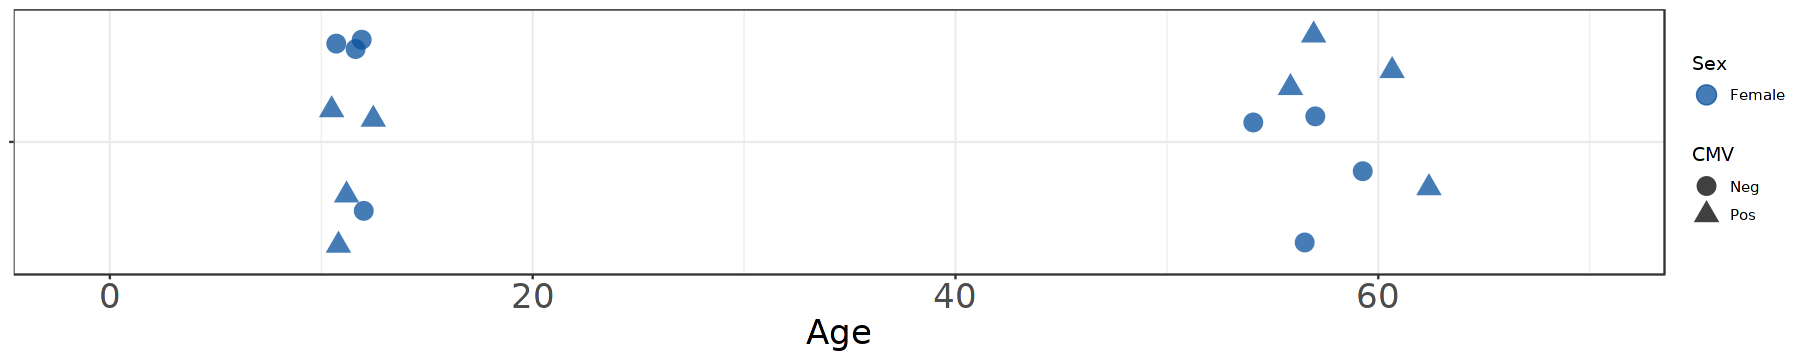

In [84]:
options(repr.plot.width = 15, repr.plot.height = 3)
p2 <- ggplot(tea_samples, aes(x=Age, y=filler)) + geom_jitter(aes(color=Sex,shape=CMV), size=5, width=1.5, height=0.5, alpha=0.75) +
    scale_color_manual(values=c('#08519c','#9ecae1')) + xlim(-1,70) +
    theme_bw() + 
    theme(axis.text.x = element_text(size=20),
          axis.text.y = element_blank(),
          axis.title.y = element_blank(),
          axis.title.x = element_text(size=20),
          legend.position = 'right')
p2

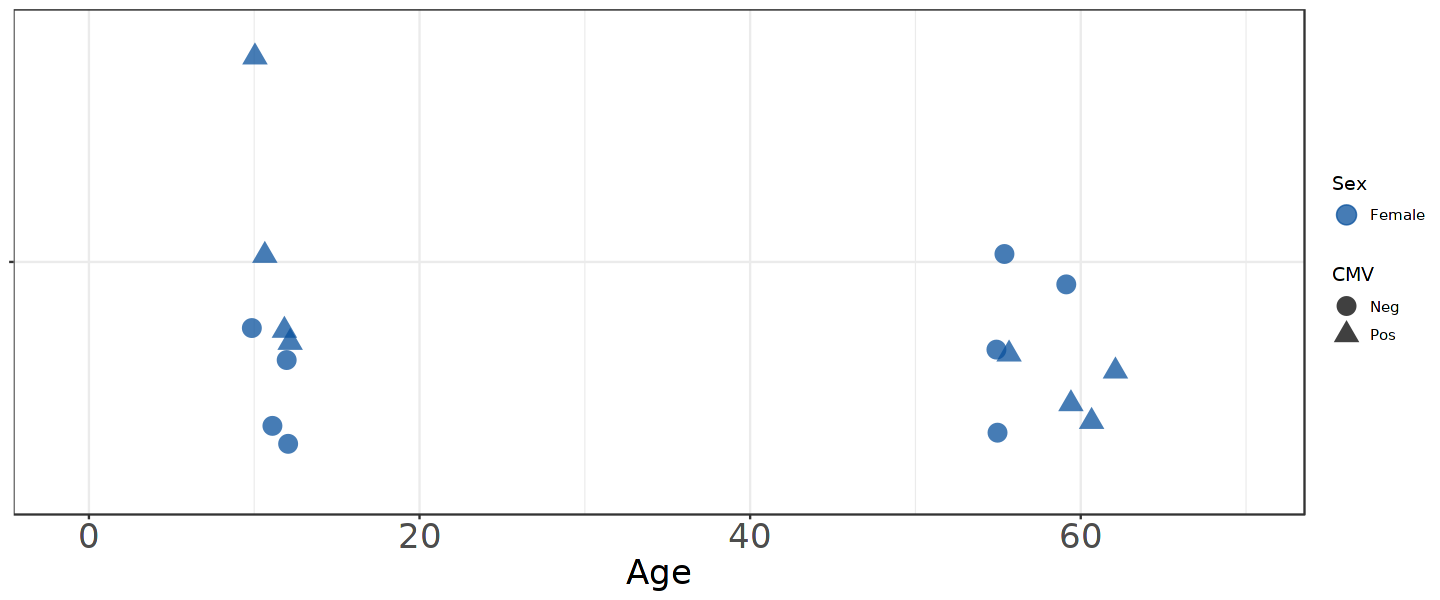

In [94]:
options(repr.plot.width = 12, repr.plot.height = 5)
p2

## TEA

In [95]:
# Open a pdf file
pdf("plots/TEA_samples_plot.pdf", width = 12, height = 5) 
# 2. Create a plot
p2
# Close the pdf file
dev.off() 

png 
  2

# Fig1d

## CD4 vs CD8 SP Gate

In [2]:
filtered_d0 <- readRDS('../Seurat_Objects/filtered_d0_label_transfer.rds')

In [3]:
filtered_d0 <- SetIdent(filtered_d0, value = 'batch_id')
b065 <- subset(filtered_d0, idents = 'B065')
b065 <- NormalizeData(b065, normalization.method = 'CLR', margin = 2, assay = 'ADT')

Normalizing across cells



In [4]:
b065_b069_cutoffs=data.frame(x1=c(0,2.6,0,2.6), x2=c(2.6,6,2.6,6), y1=c(0,0,3,3), y2=c(3,3,6.5,6.5), Pops=c('dnT','CD4','CD8','dpT'))

In [5]:
b065_adt_mtx_data <- as.data.frame(b065@assays$ADT@data)
b065_adt_mtx_data <- t(b065_adt_mtx_data)
b065_adt_mtx_data <- as.data.frame(b065_adt_mtx_data)

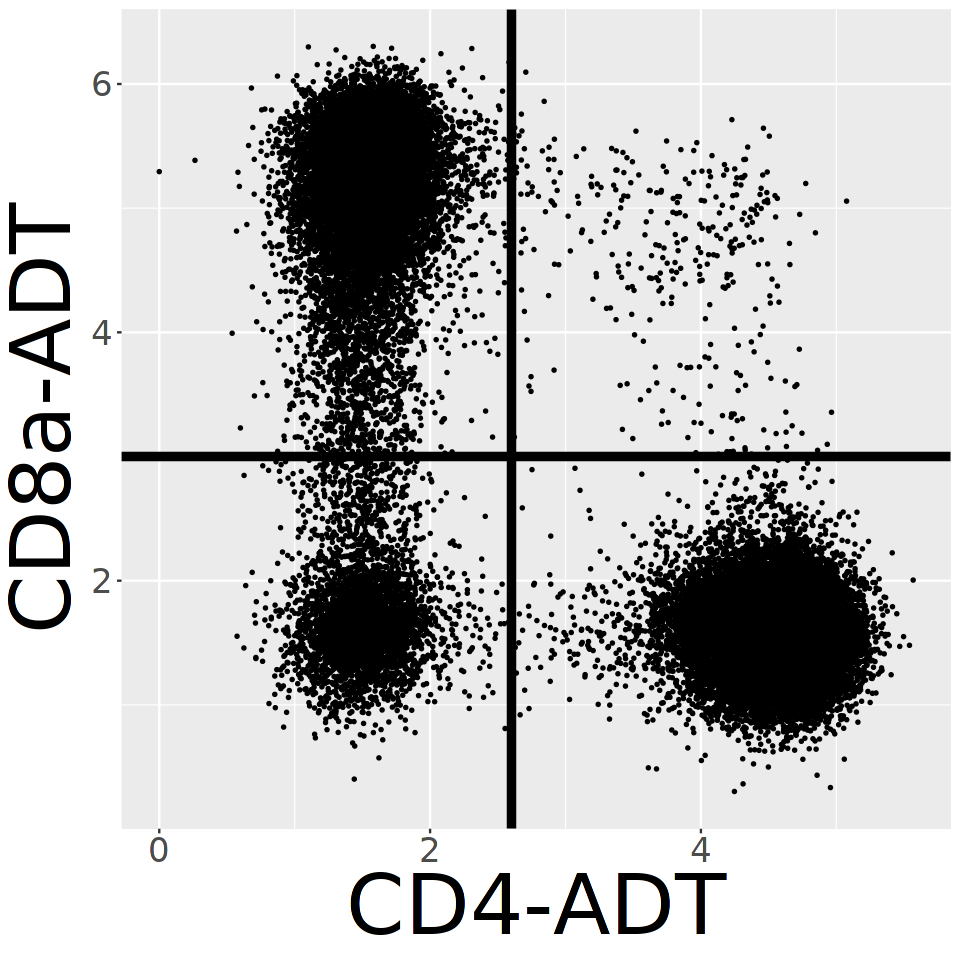

In [6]:
options(repr.plot.width = 8, repr.plot.height = 8)
ggplot(b065_adt_mtx_data, aes(x = CD4, y = CD8a)) + 
geom_point(size = 0.5) + 
geom_vline(xintercept = 2.6, size = 2) + geom_hline(yintercept = 3, size = 2) + 
# ggtitle("B065") + 
theme(axis.title = element_text(size = 50),
      axis.text = element_text(size = 20)) + 
xlab('CD4-ADT') + ylab('CD8a-ADT')

In [7]:
# Open a pdf file
pdf("/home/jupyter/Organized_Gating_Analysis/05_Figures/saved_figures/fig1b_cd4_cd8_sp.pdf") 
# 2. Create a plot
ggplot(b065_adt_mtx_data, aes(x = CD4, y = CD8a)) + 
    geom_point(size = 0.5) + 
    geom_vline(xintercept = 2.6, size = 2) + geom_hline(yintercept = 3, size = 2) + 
    # ggtitle("B065") + 
    theme(axis.title = element_text(size = 50),
          axis.text = element_text(size = 20)) + 
    xlab('CD4-ADT') + ylab('CD8a-ADT')
# Close the pdf file
dev.off() 

png 
  2

In [8]:
rm(filtered_d0)
rm(b065)

## Treg Gate

In [9]:
cd4 <- readRDS(file = '/home/jupyter/Organized_Gating_Analysis/Seurat_Objects/cd4_subset.rds')

In [10]:
cd4.batch <- SplitObject(cd4, split.by = 'batch_id')

In [11]:
cd4.batch <- lapply(cd4.batch, function(x){
    NormalizeData(x, assay = 'ADT', normalization.method = 'CLR', margin = 2)})

Normalizing across cells

Normalizing across cells

Normalizing across cells



In [12]:
df_build <- function(seurat_object){
    meta <- seurat_object@meta.data
    meta$CD127 <- as.vector(seurat_object@assays$ADT['CD127',])
    meta$CD25 <- as.vector(seurat_object@assays$ADT['CD25',])
    return(meta)}

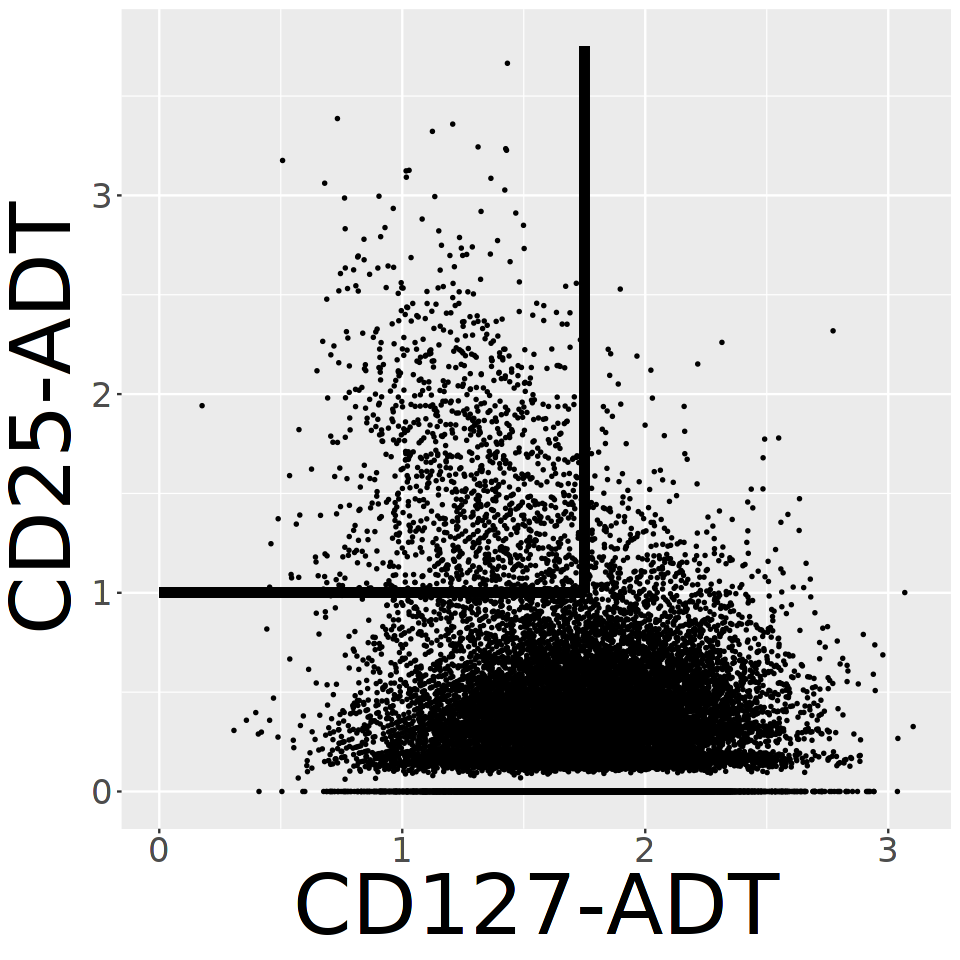

In [13]:
options(repr.plot.width = 8, repr.plot.height = 8)
treg_b065_df <- df_build(cd4.batch$`B065`)
ggplot(treg_b065_df, aes(x = CD127, y = CD25)) + geom_point(size = 0.5) +
geom_segment(aes(x=0,xend=1.75,y=1,yend=1), size = 2) +
geom_segment(aes(x=1.75,xend=1.75,y=1,yend=3.75), size = 2) +
theme(axis.title = element_text(size = 50),
      axis.text = element_text(size = 20)) + 
xlab('CD127-ADT') + ylab('CD25-ADT')

In [14]:
# Open a pdf file
pdf("/home/jupyter/Organized_Gating_Analysis/05_Figures/saved_figures/fig1b_treg_gate.pdf") 
# 2. Create a plot
treg_b065_df <- df_build(cd4.batch$`B065`)
ggplot(treg_b065_df, aes(x = CD127, y = CD25)) + geom_point(size = 0.5) +
geom_segment(aes(x=0,xend=1.75,y=1,yend=1), size = 2) +
geom_segment(aes(x=1.75,xend=1.75,y=1,yend=3.75), size = 2) +
theme(axis.title = element_text(size = 50),
      axis.text = element_text(size = 20)) + 
xlab('CD127-ADT') + ylab('CD25-ADT')
# Close the pdf file
dev.off()

png 
  2

In [15]:
rm(cd4)
rm(cd4.batch)

## ADT histograms

In [16]:
cd8 <- readRDS(file = '/home/jupyter/Organized_Gating_Analysis/Seurat_Objects/cd8_subset.rds')

In [17]:
cd8.batch <- SplitObject(cd8, split.by = 'batch_id')

In [18]:
cd8.batch <- lapply(cd8.batch, function(x){
    NormalizeData(x, assay = 'ADT', normalization.method = 'CLR', margin = 2)})

Normalizing across cells

Normalizing across cells

Normalizing across cells



In [19]:
df_build <- function(seurat_object){
    meta <- seurat_object@meta.data
    meta$TCRValpha7.2 <- as.vector(seurat_object@assays$ADT['TCR-Valpha7.2',])
    meta$CD161 <- as.vector(seurat_object@assays$ADT['CD161',])
    meta$CD197 <- as.vector(seurat_object@assays$ADT['CD197',])
    meta$CD45RA <- as.vector(seurat_object@assays$ADT['CD45RA',])
    meta$CD27 <- as.vector(seurat_object@assays$ADT['CD27',])
    meta$imputed_CD197 <- as.vector(seurat_object@assays$x10_ADT['CD197',])
    meta$raw_CD197 <- as.vector(seurat_object@assays$ADT@counts['CD197',])
    meta$raw_CD45RA <- as.vector(seurat_object@assays$ADT@counts['CD45RA',])
    meta$raw_CD27 <- as.vector(seurat_object@assays$ADT@counts['CD27',])
    return(meta)}

In [20]:
b065_df <- df_build(cd8.batch$`B065`)

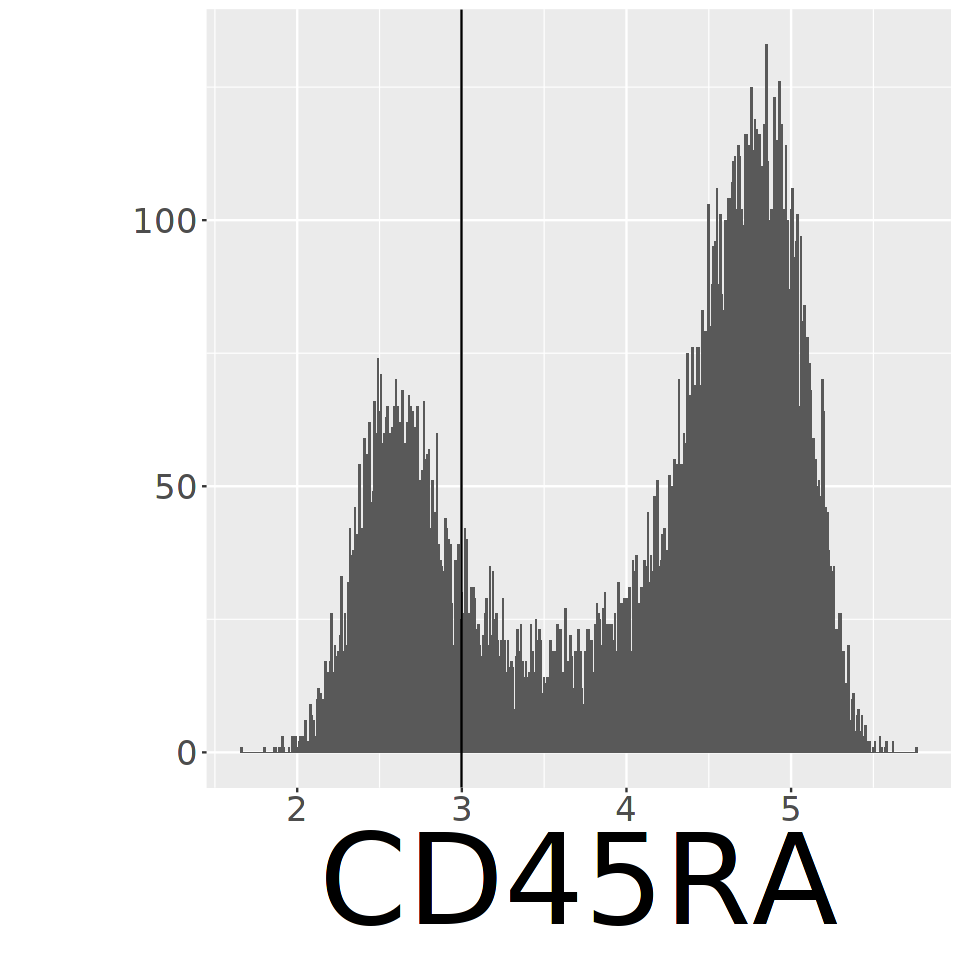

In [21]:
options(repr.plot.width = 8, repr.plot.height = 8)
ggplot(b065_df, aes(x = CD45RA)) + geom_histogram(binwidth = .01) + geom_vline(xintercept = 3) + 
theme(axis.title = element_text(size = 75),
      axis.text = element_text(size = 20)) + 
xlab('CD45RA') + ylab('')

In [22]:
# Open a pdf file
pdf("/home/jupyter/Organized_Gating_Analysis/05_Figures/saved_figures/fig1b_CD45RA.pdf") 
# 2. Create a plot
ggplot(b065_df, aes(x = CD45RA)) + geom_histogram(binwidth = .01) + geom_vline(xintercept = 3) + 
theme(axis.title = element_text(size = 75),
      axis.text = element_text(size = 20)) + 
xlab('CD45RA') + ylab('')
# Close the pdf file
dev.off()

png 
  2

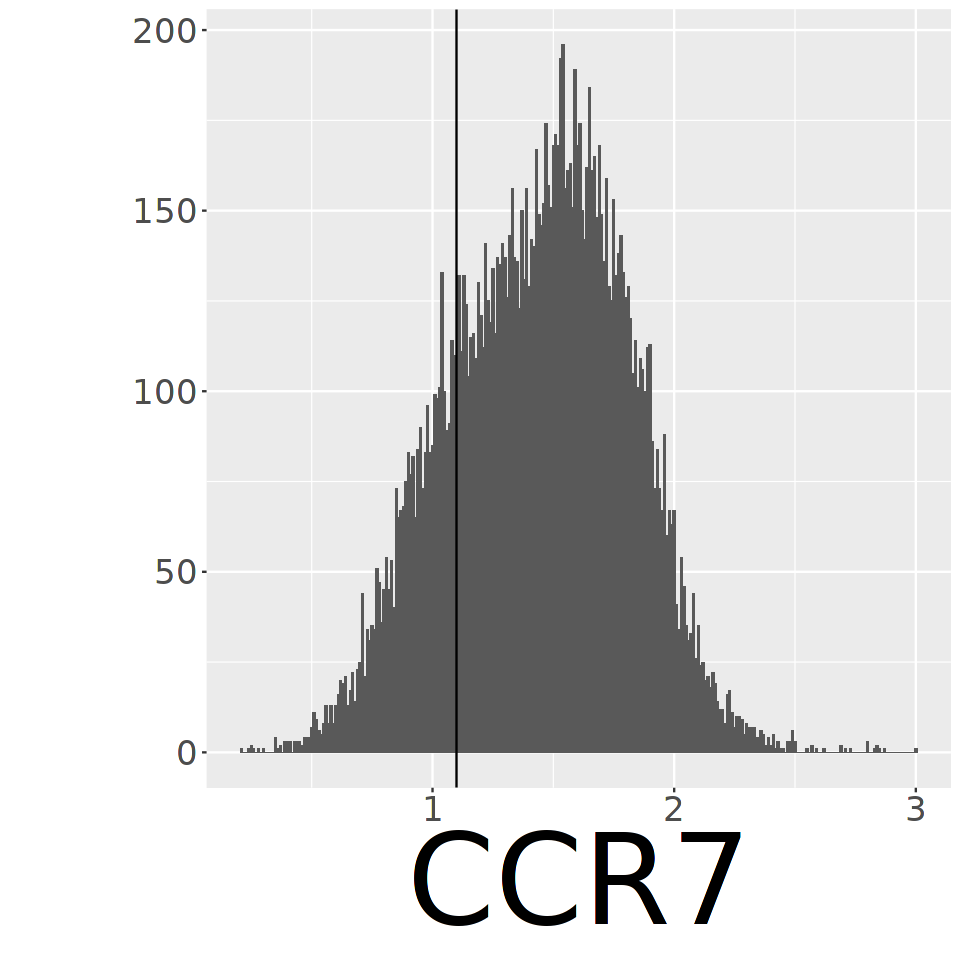

In [23]:
ggplot(b065_df, aes(x = CD197)) + geom_histogram(binwidth = .01) + geom_vline(xintercept = 1.1) + 
theme(axis.title = element_text(size = 75),
      axis.text = element_text(size = 20)) + 
xlab('CCR7') + ylab('')

In [24]:
# Open a pdf file
pdf("/home/jupyter/Organized_Gating_Analysis/05_Figures/saved_figures/fig1b_CCR7.pdf") 
# 2. Create a plot
ggplot(b065_df, aes(x = CD197)) + geom_histogram(binwidth = .01) + geom_vline(xintercept = 1.1) + 
theme(axis.title = element_text(size = 75),
      axis.text = element_text(size = 20)) + 
xlab('CCR7') + ylab('')
# Close the pdf file
dev.off()

png 
  2

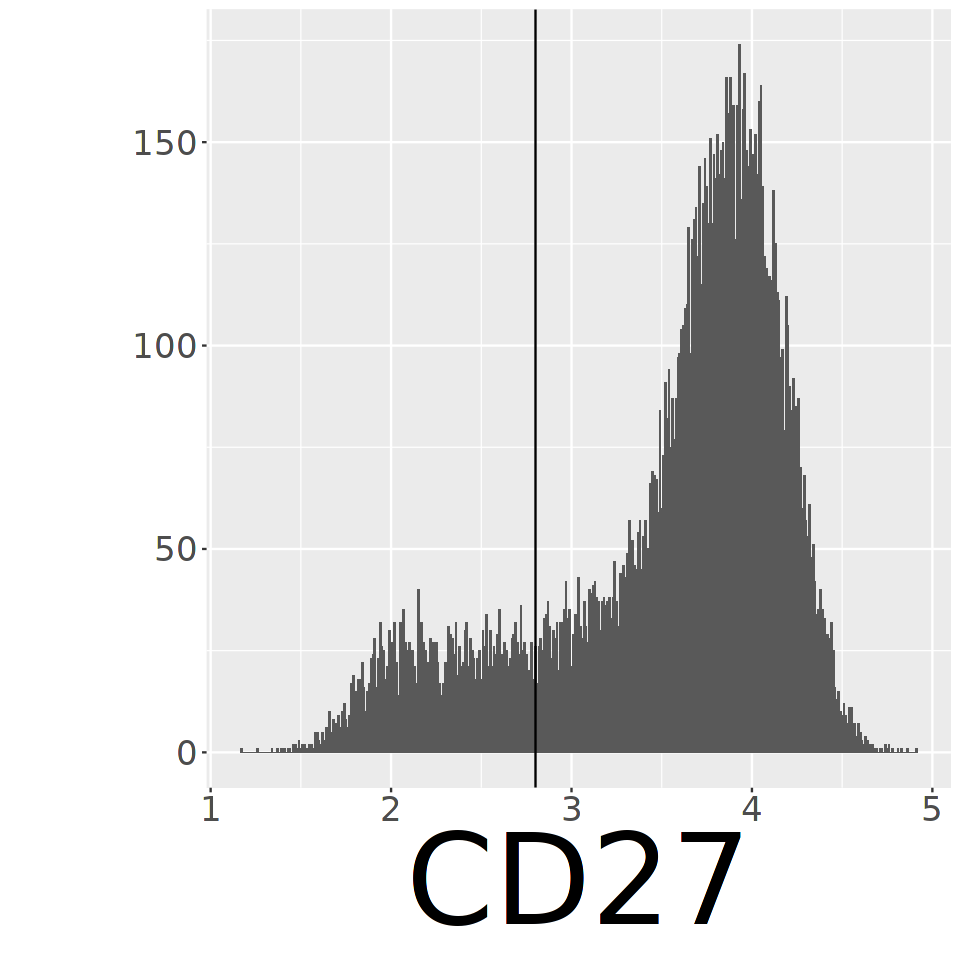

In [25]:
ggplot(b065_df, aes(x = CD27)) + geom_histogram(binwidth = .01) + geom_vline(xintercept = 2.8) + 
theme(axis.title = element_text(size = 75),
      axis.text = element_text(size = 20)) + 
xlab('CD27') + ylab('')

In [26]:
# Open a pdf file
pdf("/home/jupyter/Organized_Gating_Analysis/05_Figures/saved_figures/fig1b_CD27.pdf") 
# 2. Create a plot
ggplot(b065_df, aes(x = CD27)) + geom_histogram(binwidth = .01) + geom_vline(xintercept = 2.8) + 
theme(axis.title = element_text(size = 75),
      axis.text = element_text(size = 20)) + 
xlab('CD27') + ylab('')
# Close the pdf file
dev.off()

png 
  2

In [27]:
rm(cd8)
rm(cd8.batch)

## CD8 Density Plots

In [28]:
cd8_na <- readRDS('/home/jupyter/Organized_Gating_Analysis/Seurat_Objects/cd8_naive.rds')
cd8_cm <- readRDS('/home/jupyter/Organized_Gating_Analysis/Seurat_Objects/cd8_cm.rds')
cd8_em <- readRDS('/home/jupyter/Organized_Gating_Analysis/Seurat_Objects/cd8_em.rds')
cd8_emra <- readRDS('/home/jupyter/Organized_Gating_Analysis/Seurat_Objects/cd8_emra.rds')

In [29]:
cd8_pops <- merge(cd8_na, c(cd8_cm, cd8_em, cd8_emra))

In [30]:
cd8_pops.batch <- SplitObject(cd8_pops, 'batch_id')

In [31]:
df_cd8_b065 <- df_build(cd8_pops.batch$B065)

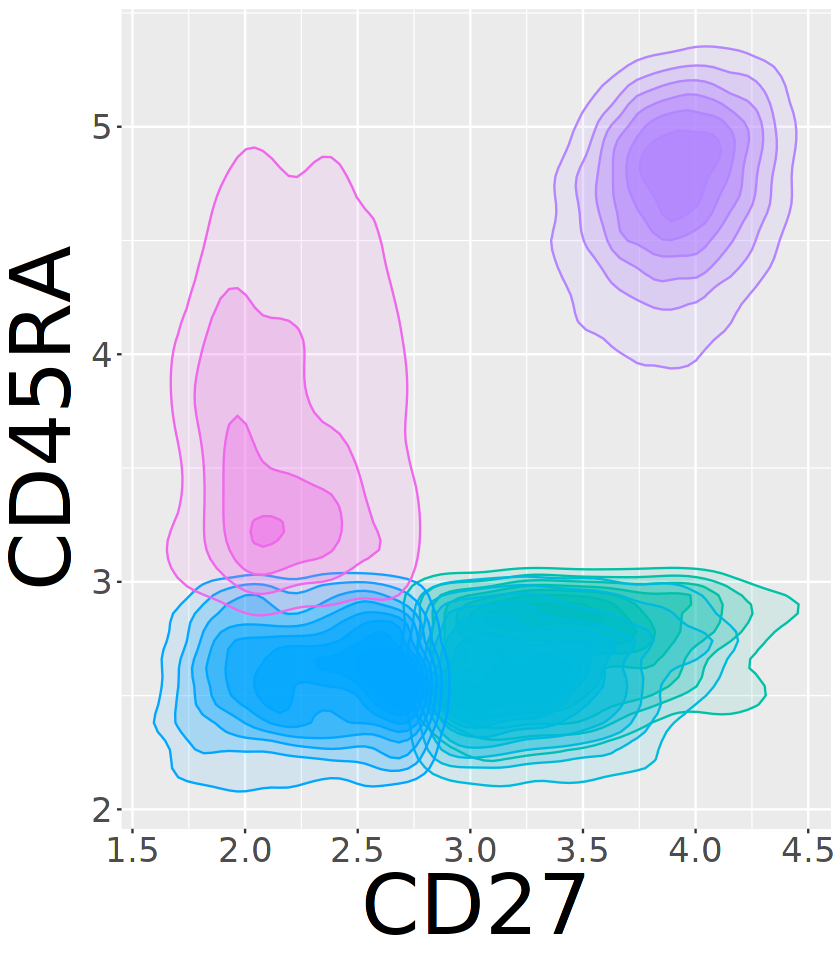

In [32]:
options(repr.plot.width = 7, repr.plot.height = 8)
ggplot(df_cd8_b065, aes(x = CD27, y = CD45RA, color = gating_celltype)) + 
stat_density_2d(geom = 'polygon', aes(alpha = ..level.., fill = gating_celltype), bins = 10) + 
scale_fill_manual(values = c('#00C1A7','#00BADE','#00A6FF','#B385FF','#EF67EB')) +
scale_color_manual(values = c('#00C1A7','#00BADE','#00A6FF','#B385FF','#EF67EB')) +
theme(axis.title = element_text(size = 50),
      axis.text = element_text(size = 20),
      legend.position = 'none') + 
xlab('CD27') + ylab('CD45RA')

In [33]:
# Open a pdf file
pdf("/home/jupyter/Organized_Gating_Analysis/05_Figures/saved_figures/fig1b_CD8_CD27_CD45RA.pdf") 
# 2. Create a plot
ggplot(df_cd8_b065, aes(x = CD27, y = CD45RA, color = gating_celltype)) + 
stat_density_2d(geom = 'polygon', aes(alpha = ..level.., fill = gating_celltype), bins = 10) + 
scale_fill_manual(values = c('#00C1A7','#00BADE','#00A6FF','#B385FF','#EF67EB')) +
scale_color_manual(values = c('#00C1A7','#00BADE','#00A6FF','#B385FF','#EF67EB')) +
theme(axis.title = element_text(size = 50),
      axis.text = element_text(size = 20),
      legend.position = 'none') + 
xlab('CD27') + ylab('CD45RA')
# Close the pdf file
dev.off()

png 
  2

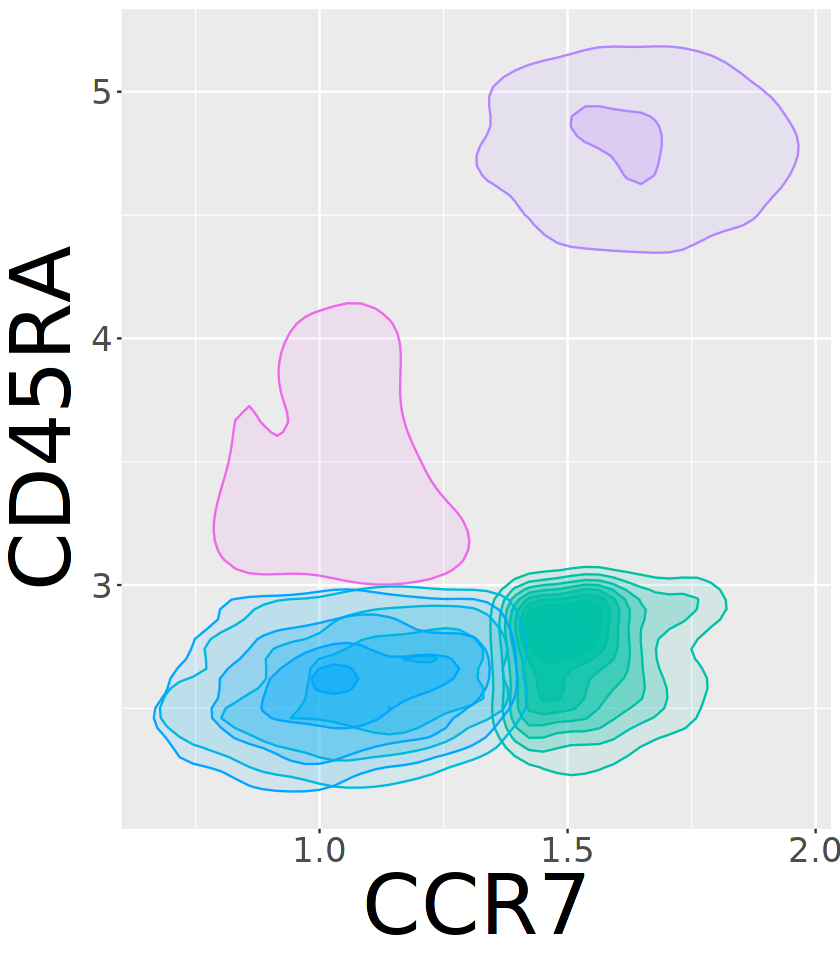

In [34]:
ggplot(df_cd8_b065, aes(x = CD197, y = CD45RA, color = gating_celltype)) + 
stat_density_2d(geom = 'polygon', aes(alpha = ..level.., fill = gating_celltype), bins = 10) + 
scale_fill_manual(values = c('#00C1A7','#00BADE','#00A6FF','#B385FF','#EF67EB')) +
scale_color_manual(values = c('#00C1A7','#00BADE','#00A6FF','#B385FF','#EF67EB')) +
theme(axis.title = element_text(size = 50),
      axis.text = element_text(size = 20),
      legend.position = 'none') + 
xlab('CCR7') + ylab('CD45RA')

In [35]:
# Open a pdf file
pdf("/home/jupyter/Organized_Gating_Analysis/05_Figures/saved_figures/fig1b_CD8_CCR7_CD45RA.pdf") 
# 2. Create a plot
ggplot(df_cd8_b065, aes(x = CD197, y = CD45RA, color = gating_celltype)) + 
stat_density_2d(geom = 'polygon', aes(alpha = ..level.., fill = gating_celltype), bins = 10) + 
scale_fill_manual(values = c('#00C1A7','#00BADE','#00A6FF','#B385FF','#EF67EB')) +
scale_color_manual(values = c('#00C1A7','#00BADE','#00A6FF','#B385FF','#EF67EB')) +
theme(axis.title = element_text(size = 50),
      axis.text = element_text(size = 20),
      legend.position = 'none') + 
xlab('CCR7') + ylab('CD45RA')
# Close the pdf file
dev.off()

png 
  2

In [36]:
rm(cd8_na)
rm(cd8_cm)
rm(cd8_em)
rm(cd8_emra)
rm(cd8_pops)
rm(cd8_pops.batch)

## CD4 Density Plots

In [37]:
cd4_na <- readRDS('/home/jupyter/Organized_Gating_Analysis/Seurat_Objects/cd4_naive.rds')
cd4_cm <- readRDS('/home/jupyter/Organized_Gating_Analysis/Seurat_Objects/cd4_cm.rds')
cd4_em <- readRDS('/home/jupyter/Organized_Gating_Analysis/Seurat_Objects/cd4_em.rds')
cd4_emra <- readRDS('/home/jupyter/Organized_Gating_Analysis/Seurat_Objects/cd4_emra.rds')

In [38]:
cd4_pops <- merge(cd4_na, c(cd4_cm, cd4_em, cd4_emra))

In [39]:
cd4_pops.batch <- SplitObject(cd4_pops, 'batch_id')

In [40]:
df_cd4_b065 <- df_build(cd4_pops.batch$`B065`)

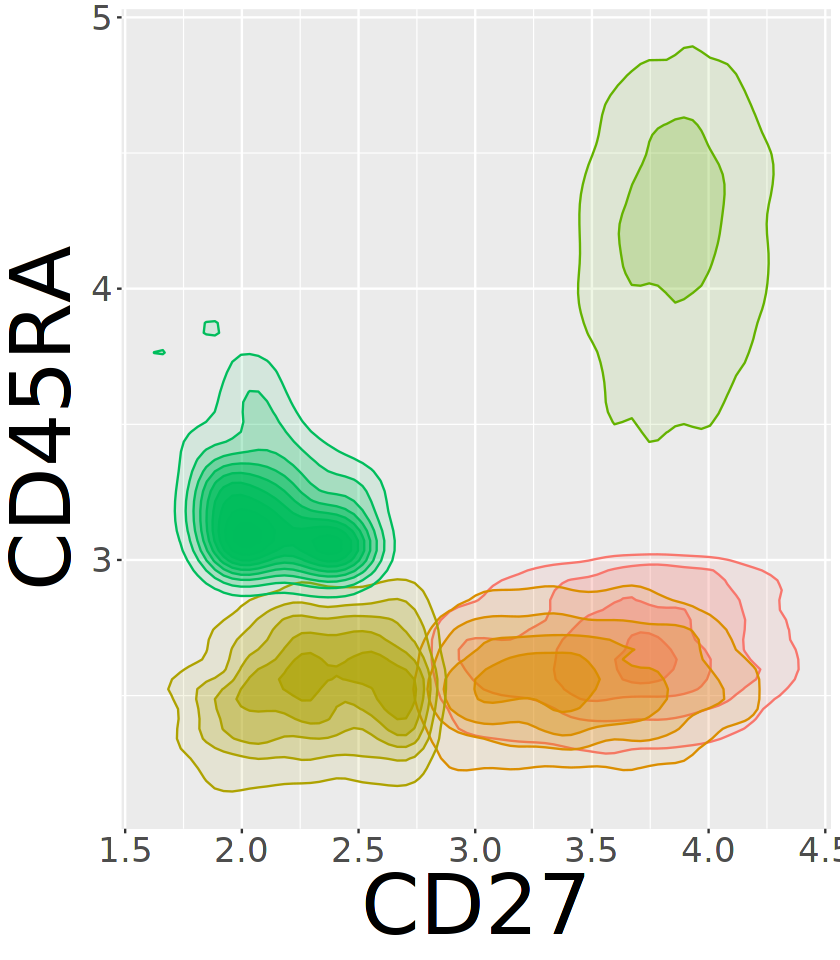

In [41]:
ggplot(df_cd4_b065, aes(x = CD27, y = CD45RA, color = gating_celltype)) + 
stat_density_2d(geom = 'polygon', aes(alpha = ..level.., fill = gating_celltype), bins = 10) + 
scale_fill_manual(values = c('#F8766D','#DB8E00','#AEA200','#64B200','#00BD5C')) +
scale_color_manual(values = c('#F8766D','#DB8E00','#AEA200','#64B200','#00BD5C')) +
theme(axis.title = element_text(size = 50),
      axis.text = element_text(size = 20),
      legend.position = 'none') + 
xlab('CD27') + ylab('CD45RA')

In [42]:
# Open a pdf file
pdf("/home/jupyter/Organized_Gating_Analysis/05_Figures/saved_figures/fig1b_CD4_CD27_CD45RA.pdf") 
# 2. Create a plot
ggplot(df_cd4_b065, aes(x = CD27, y = CD45RA, color = gating_celltype)) + 
stat_density_2d(geom = 'polygon', aes(alpha = ..level.., fill = gating_celltype), bins = 10) + 
scale_fill_manual(values = c('#F8766D','#DB8E00','#AEA200','#64B200','#00BD5C')) +
scale_color_manual(values = c('#F8766D','#DB8E00','#AEA200','#64B200','#00BD5C')) +
theme(axis.title = element_text(size = 50),
      axis.text = element_text(size = 20),
      legend.position = 'none') + 
xlab('CD27') + ylab('CD45RA')
# Close the pdf file
dev.off()

png 
  2

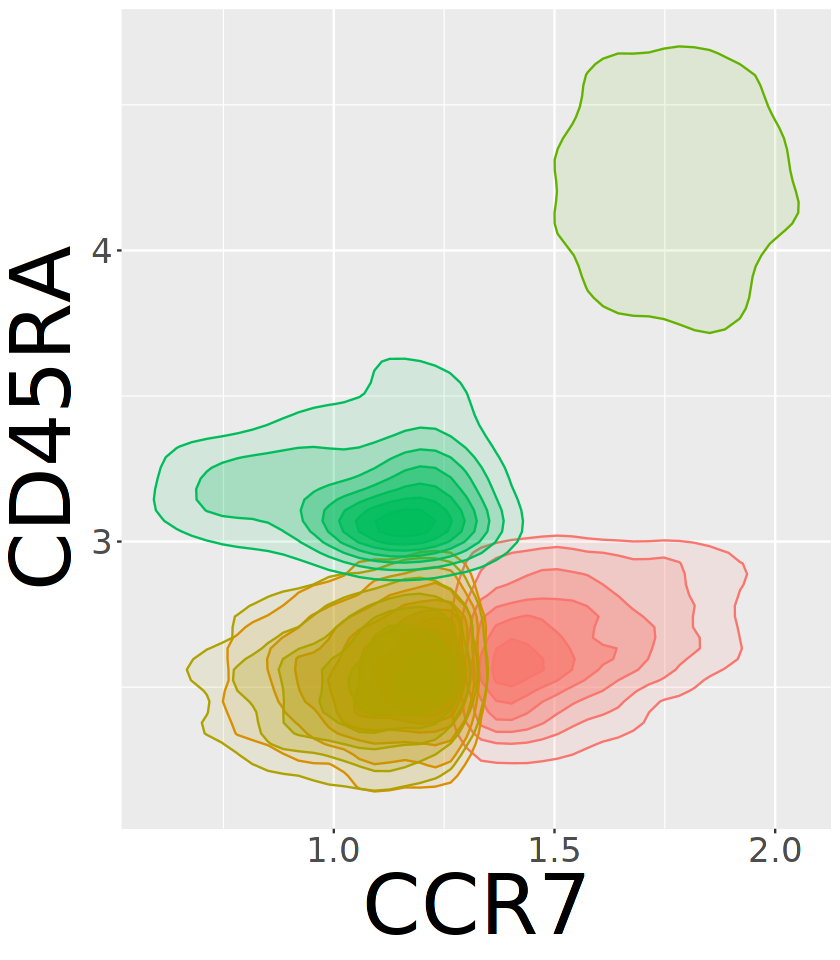

In [43]:
ggplot(df_cd4_b065, aes(x = CD197, y = CD45RA, color = gating_celltype)) + 
stat_density_2d(geom = 'polygon', aes(alpha = ..level.., fill = gating_celltype), bins = 10) + 
scale_fill_manual(values = c('#F8766D','#DB8E00','#AEA200','#64B200','#00BD5C')) +
scale_color_manual(values = c('#F8766D','#DB8E00','#AEA200','#64B200','#00BD5C')) +
theme(axis.title = element_text(size = 50),
      axis.text = element_text(size = 20),
      legend.position = 'none') + 
xlab('CCR7') + ylab('CD45RA')

In [44]:
# Open a pdf file
pdf("/home/jupyter/Organized_Gating_Analysis/05_Figures/saved_figures/fig1b_CD4_CCR7_CD45RA.pdf") 
# 2. Create a plot
ggplot(df_cd4_b065, aes(x = CD197, y = CD45RA, color = gating_celltype)) + 
stat_density_2d(geom = 'polygon', aes(alpha = ..level.., fill = gating_celltype), bins = 10) + 
scale_fill_manual(values = c('#F8766D','#DB8E00','#AEA200','#64B200','#00BD5C')) +
scale_color_manual(values = c('#F8766D','#DB8E00','#AEA200','#64B200','#00BD5C')) +
theme(axis.title = element_text(size = 50),
      axis.text = element_text(size = 20),
      legend.position = 'none') + 
xlab('CCR7') + ylab('CD45RA')
# Close the pdf file
dev.off()

png 
  2

In [45]:
rm(cd4_na)
rm(cd4_cm)
rm(cd4_em)
rm(cd4_emra)
rm(cd4_pops)
rm(cd4_pops.batch)

# Figure 1e

In [51]:
sp_merge <- readRDS(file = '../Seurat_Objects/sp_merge_gating_celltype_updated.rds')

In [52]:
sp_merge <- SetIdent(sp_merge, value = 'gating_celltype')
sp_merge <- subset(sp_merge, idents = c('CD4 Unk','CD8 Unk'), invert = TRUE)

In [55]:
wnn_df <- as.data.frame(sp_merge@reductions$wnn.3.umap@cell.embeddings)
wnn_df$gating_celltype <- sp_merge$gating_celltype
head(wnn_df)

,wnn3umap_1,wnn3umap_2,gating_celltype
,<dbl>,<dbl>,<chr>
970c3f98e40811eba89d42010a19c839,-0.8019088,-5.895669,CD8 Naive
971b0bd6e40811eba89d42010a19c839,0.3050871,-5.484430,CD8 Naive
97267fdee40811eba89d42010a19c839,-0.3288510,-5.762752,CD8 Naive
9728e26ae40811eba89d42010a19c839,-0.7747660,-7.751556,CD8 Naive
97475100e40811eba89d42010a19c839,-0.3597772,-6.296741,CD8 Naive
97789738e40811eba89d42010a19c839,-1.9845226,-6.573844,CD8 Naive


## Cell type Density Plot

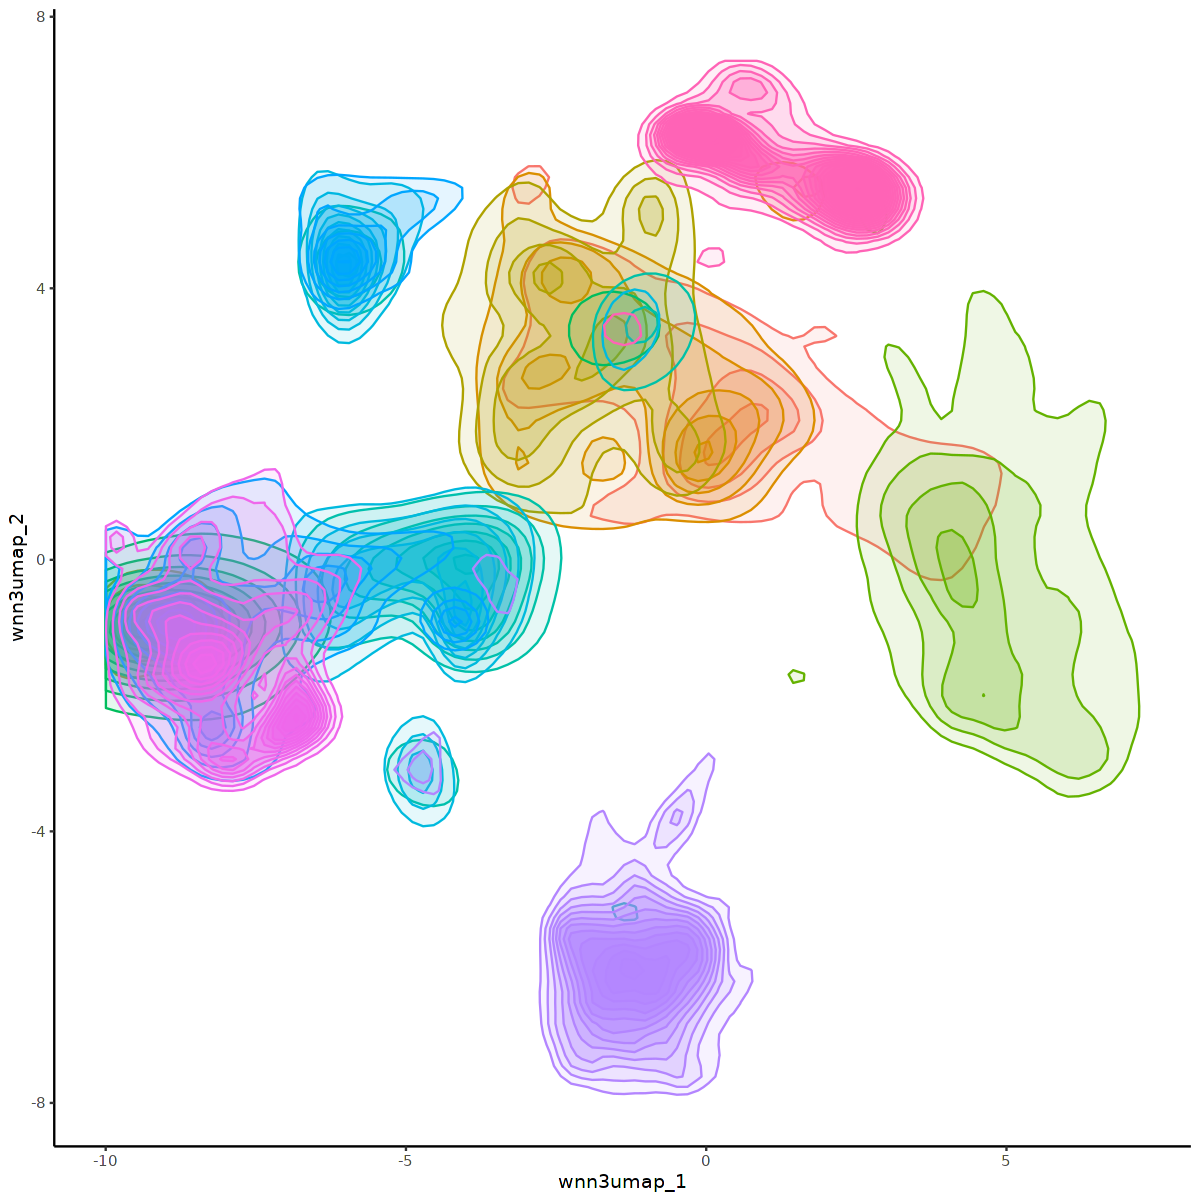

In [58]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(wnn_df, aes(x = wnn3umap_1, y = wnn3umap_2, color = gating_celltype)) + #geom_point(shape = ".") +
stat_density_2d(geom = 'polygon', aes(alpha = ..level.., fill = gating_celltype), bins = 25) +
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank(),axis.line = element_line(colour = "black"),
      legend.position = 'none') 

In [59]:
# Open a pdf file
pdf("/home/jupyter/Organized_Gating_Analysis/05_Figures/saved_figures/fig2_wnn_density_umap.pdf", width = 10, height = 10) 
# 2. Create a plot
ggplot(wnn_df, aes(x = wnn3umap_1, y = wnn3umap_2, color = gating_celltype)) + #geom_point(shape = ".") +
stat_density_2d(geom = 'polygon', aes(alpha = ..level.., fill = gating_celltype), bins = 25) +
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank(),axis.line = element_line(colour = "black"),
      legend.position = 'none') 
# Close the pdf file
dev.off()

png 
  2